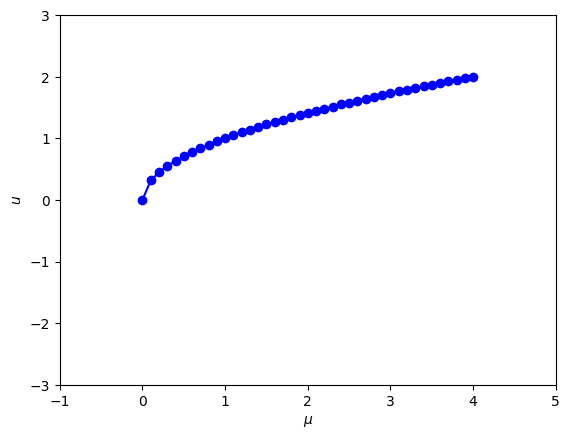

Running baby continuation with fixed mu steps...
Newton cannot progress past the fold; secant continuation is required.
Newton cannot progress past the fold; secant continuation is required.


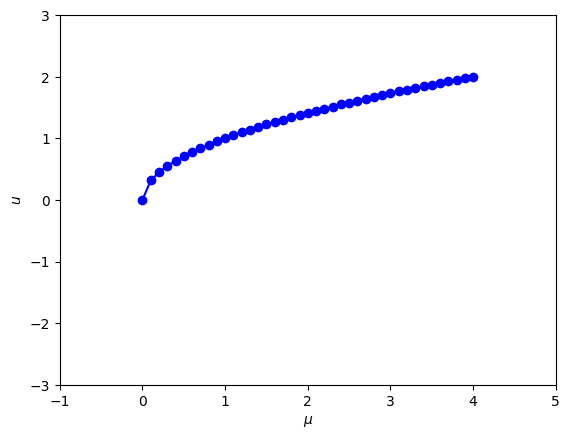

In [11]:
import numpy as np
import matplotlib.pyplot as plt

try:  # Match display behavior in secant notebook
    from IPython.display import DisplayHandle
except ImportError:
    DisplayHandle = None


def f0(u, mu):
    """Scalar equilibrium condition f(u, mu) = mu - u^2."""
    return mu - u**2


def df0(u, mu):
    """Derivative of f with respect to u (singular at u = 0)."""
    return -2.0 * u


def main():
    tol = 1e-6
    max_iter = 10
    ds = 1e-1
    max_steps = 100
    singular_tol = 1e-12

    v0 = np.array([2.0, 4.0])
    mus = [v0[1]]
    us = [v0[0]]

    fig, ax = plt.subplots()
    ax.set_xlabel(r"$\mu$")
    ax.set_ylabel(r"$u$")
    ax.set_xlim([-1, 5])
    ax.set_ylim([-3, 3])
    (line,) = ax.plot(mus, us, "bo-")
    display_handle = None
    if DisplayHandle is not None:
        display_handle = DisplayHandle()
        display_handle.display(fig)
    else:
        plt.show(block=False)
        fig.canvas.draw()
        fig.canvas.flush_events()

    print("Running baby continuation with fixed mu steps...")
    for step in range(max_steps):
        mu_target = mus[-1] - ds  # march toward the turning point at mu = 0
        u_guess = us[-1]
        error = np.inf
        iter_count = 0

        while error > tol and iter_count < max_iter:
            res = f0(u_guess, mu_target)
            error = abs(res)
            jac = df0(u_guess, mu_target)
            if abs(jac) < singular_tol:
                print(f"Baby continuation fails near mu={mu_target:.4f}: singular Jacobian")
                error = np.inf
                break
            u_guess -= res / jac
            iter_count += 1

        if error > tol:
            print("Newton cannot progress past the fold; secant continuation is required.")
            break

        mus.append(mu_target)
        us.append(u_guess)
        line.set_data(mus, us)
        if display_handle is not None:
            display_handle.update(fig)
        else:
            fig.canvas.draw_idle()
            fig.canvas.flush_events()
            plt.pause(0.01)

    if display_handle is None:
        plt.show()


if __name__ == "__main__":
    main()